<a href="https://colab.research.google.com/github/RenatevanKempen/hello-world/blob/master/E9_CIFAR_10_Classification_Using_Deep_Learning%20with%20the%20answers%20from%20Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP #0: PROBLEM STATEMENT  

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html



# STEP #1: IMPORT LIBRARIES

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow-gpu==2.0.0.alpha0

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle

In [4]:
tf.__version__

'2.0.0-alpha0'

# STEP #2: LOAD DATASET

In [0]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_test.shape

(10000, 1)

# STEP #3: DATA VISUALIZATION

array([8], dtype=uint8)

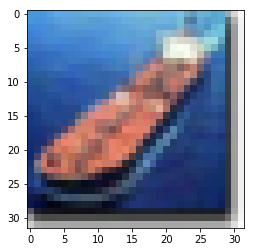

In [10]:
i = 3333
plt.imshow(X_train[i])
y_train[i]

array([5])

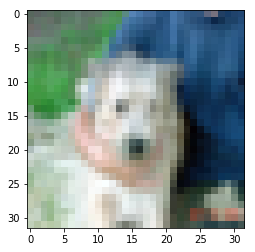

In [11]:
i = 444
plt.imshow(X_test[i])
y_test[i]

array([1], dtype=uint8)

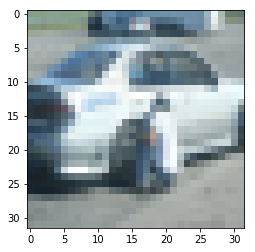

In [12]:
i = 30009
plt.imshow(X_train[i])
y_train[i]

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


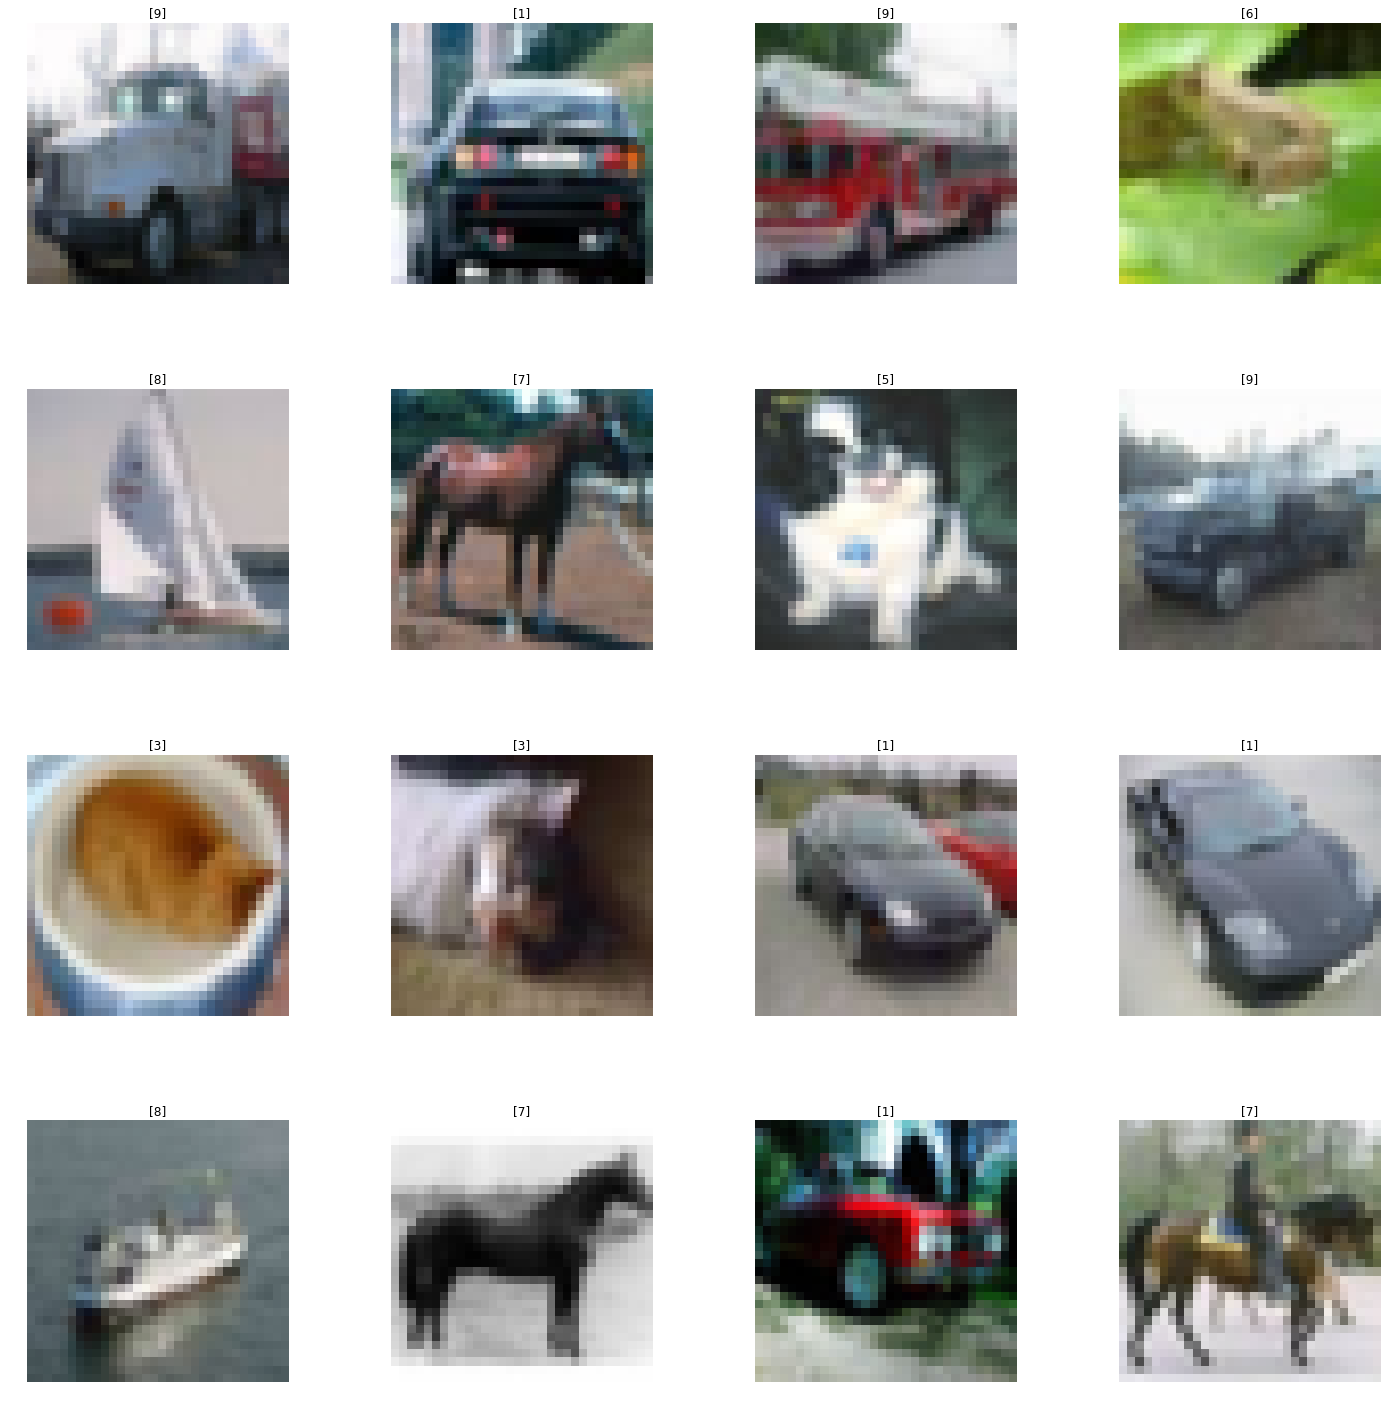

In [13]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 4
L_grid = 4

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 12)
    #to avoid having any x and y axes, you better turn this off
    axes[i].axis('off')
    #axes[i].axis('on')
plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => Airplanes
# 1 => Cars
# 2 => Birds
# 3 => Cats
# 4 => Deer
# 5 => Dogs
# 6 => Frogs
# 7 => Horses
# 8 => Ships
# 9 => Trucks

In [14]:
n_training

50000

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


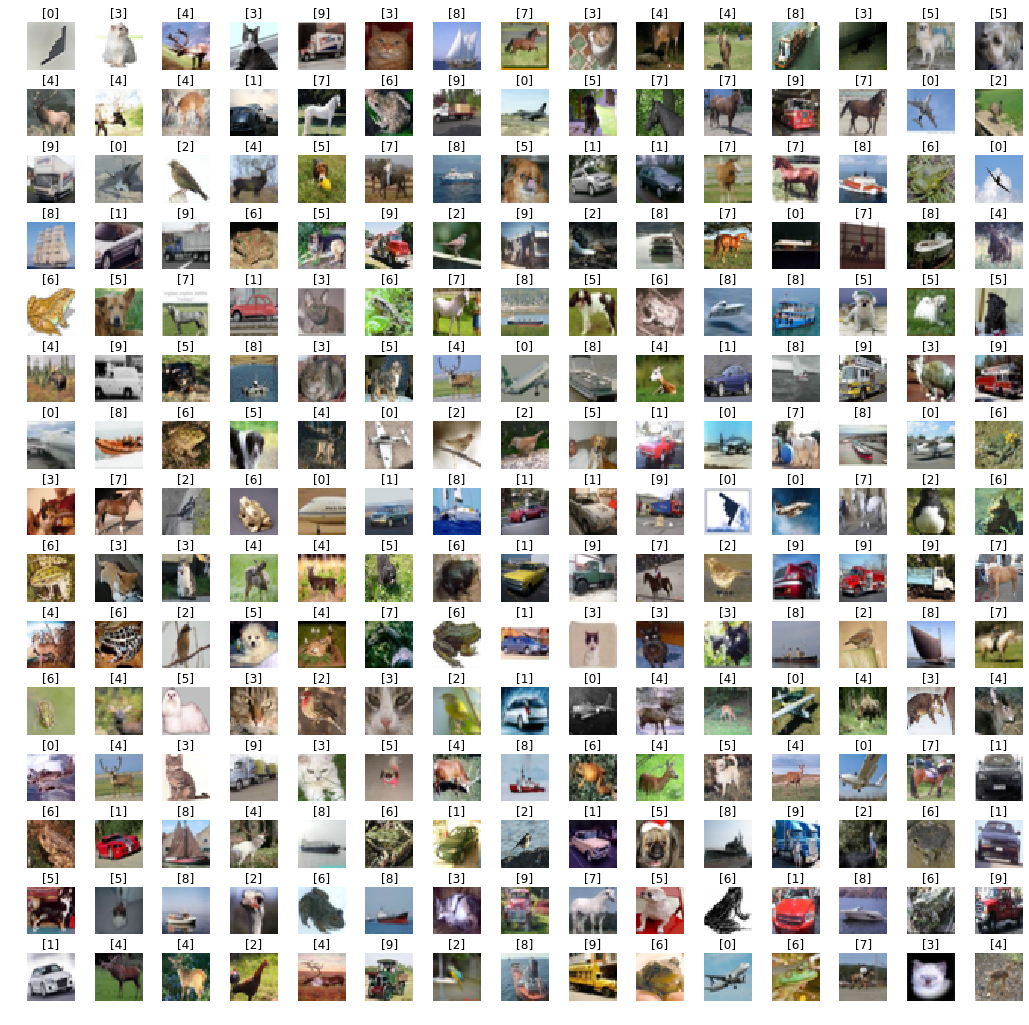

In [15]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (18,18))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 12)
    #to avoid having any x and y axes, you better turn this off
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => Airplanes
# 1 => Cars
# 2 => Birds
# 3 => Cats
# 4 => Deer
# 5 => Dogs
# 6 => Frogs
# 7 => Horses
# 8 => Ships
# 9 => Trucks

# STEP#4: DATA PREPARATION

In [16]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [0]:
#Normalize the data
X_train = X_train / 255
X_test = X_test / 255

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
number_cat = 10

In [22]:
y_train

array([[3],
       [0],
       [8],
       ...,
       [4],
       [6],
       [2]], dtype=uint8)

In [23]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

Using TensorFlow backend.


In [24]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [0]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [26]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [27]:
X_test.shape

(10000, 32, 32, 3)

In [28]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

In [29]:
y_train.shape

(50000, 10)

# STEP #5: TRAIN THE MODEL

In [30]:
from tensorflow.keras import datasets, layers, models

CiFar = models.Sequential()
CiFar.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
CiFar.add(layers.Conv2D(32, (3,3), activation = 'relu'))
CiFar.add(layers.MaxPooling2D(2,2))
CiFar.add(layers.Dropout(0.2))
CiFar.add(layers.Conv2D(64, (3,3), activation = 'relu'))
CiFar.add(layers.Conv2D(64, (3,3), activation = 'relu'))
CiFar.add(layers.MaxPooling2D(2,2))
CiFar.add(layers.Dropout(0.3))
CiFar.add(layers.Flatten())
CiFar.add(layers.Dense(1024, activation = 'relu'))
CiFar.add(layers.Dropout(0.3))
CiFar.add(layers.Dense(1024, activation = 'relu'))
CiFar.add(layers.Dense(10, activation = 'softmax'))
CiFar.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [0]:
#CiFar.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
CiFar.compile(optimizer= tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
history = CiFar.fit(X_train,
                 y_train, 
                 batch_size = 512,
                 epochs = 100)
                 #verbose = 1)

Epoch 1/100
50000/50000 [==============================] - 8s 160us/sample - loss: 2.1016 - accuracy: 0.2223
Epoch 2/100
50000/50000 [==============================] - 7s 131us/sample - loss: 1.8675 - accuracy: 0.3228
Epoch 3/100
50000/50000 [==============================] - 6s 130us/sample - loss: 1.7641 - accuracy: 0.3636
Epoch 4/100
50000/50000 [==============================] - 7s 130us/sample - loss: 1.6979 - accuracy: 0.3883
Epoch 5/100
50000/50000 [==============================] - 6s 129us/sample - loss: 1.6372 - accuracy: 0.4100
Epoch 6/100
50000/50000 [==============================] - 6s 129us/sample - loss: 1.5873 - accuracy: 0.4254
Epoch 7/100
50000/50000 [==============================] - 7s 130us/sample - loss: 1.5446 - accuracy: 0.4422
Epoch 8/100
50000/50000 [==============================] - 7s 130us/sample - loss: 1.5058 - accuracy: 0.4534
Epoch 9/100
50000/50000 [==============================] - 6s 129us/sample - loss: 1.4716 - accuracy: 0.4669
Epoch 10/100
50000/

# STEP #6: EVALUATE THE MODEL

In [34]:
score = CiFar.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(score[1]))

10000/10000 [==============================] - 2s 211us/sample - loss: 0.7043 - accuracy: 0.7683
Test Accuracy: 0.7682999968528748


In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [0]:
accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

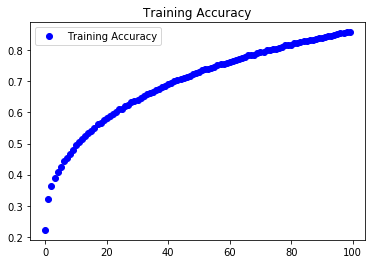

In [37]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training Accuracy')
plt.legend()

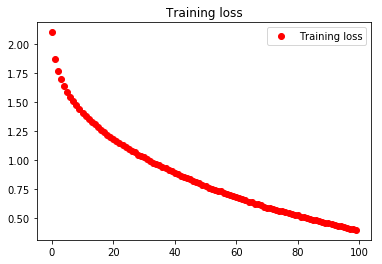

In [38]:
plt.plot(epochs, loss, 'ro', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.legend()

In [39]:
predicted_classes = CiFar.predict_classes(X_test)
predicted_classes

array([3, 8, 8, ..., 5, 1, 7])

In [0]:
#use argmax to get the maximum value out of the array in the y_test
y_test = y_test.argmax(1)

In [41]:
y_true = y_test
y_true

array([3, 8, 8, ..., 5, 1, 7])

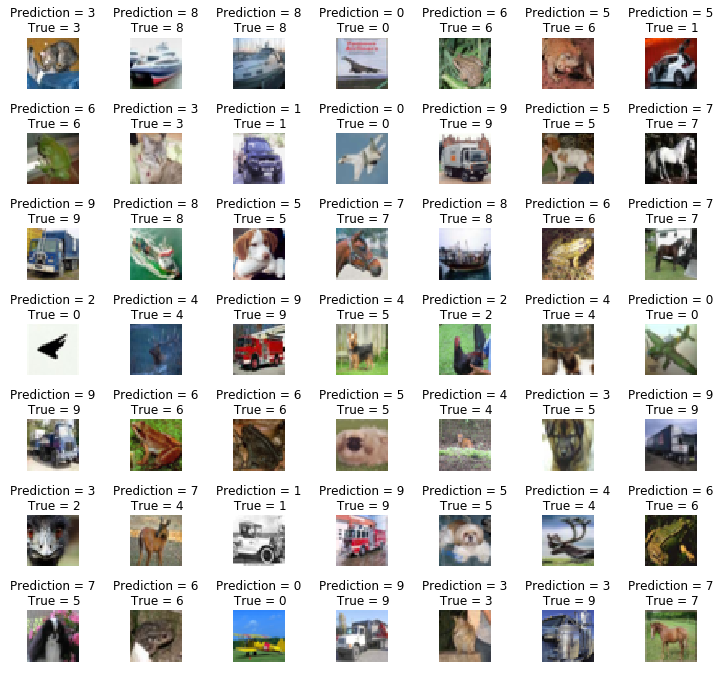

In [42]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)  

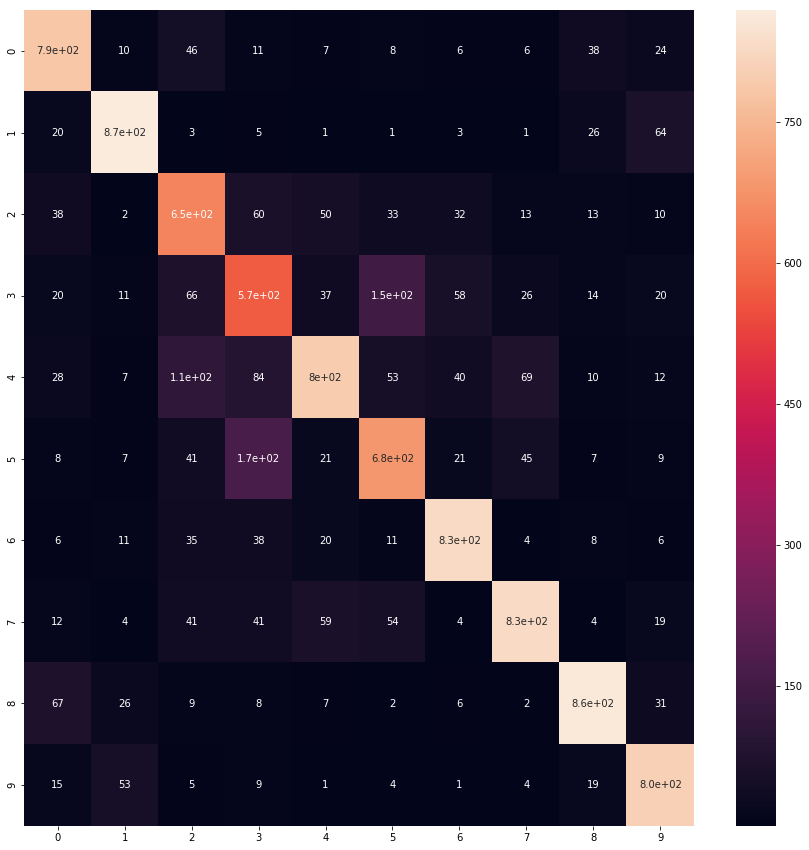

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted_classes, y_true)
plt.figure(figsize = (15, 15))
sns.heatmap(cm, annot = True)